In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from simtk import unit

In [5]:
# Load analysis data
import pickle
analysis_data = dict()
for prefix in ['sams', 'repex']:
    with open(prefix + '.pkl', 'rb') as analysisfile:
        analysis_data[prefix] = pickle.load(analysisfile)

In [25]:
print(analysis_data['sams']['cb7argon']['equilibration']['complex'].keys())

dict_keys(['discarded_from_start', 'percent_decorrelated_samples', 'iterations_considered', 'percent_correlated_samples', 'effective_samples_by_iterations_considered', 'effective_samples', 'count_total_equilibration_samples', 'equilibration_samples', 'count_correlated_samples', 'count_decorrelated_samples', 'subsample_rate', 'subsample_rate_by_iterations_considered', 'percent_total_equilibration_samples'])


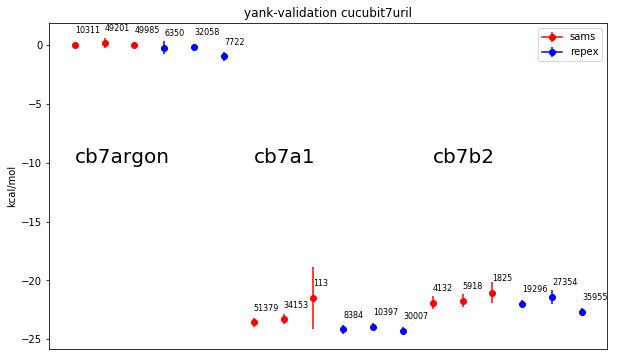

In [42]:
fig = plt.figure(figsize=[10,6]);

samplers = ['sams', 'repex']
complexes = ['cb7argon', 'cb7a1', 'cb7b2']
replicates = ['', '_2', '_3']
index = 1
colors = {'sams' : 'r', 'repex' : 'b'}
handles = list()
for complex in complexes:
    plt.text(index+1, -10, complex, fontsize=20);
    for sampler in samplers:
        for replicate in replicates:
            index += 1
            yank_dg = analysis_data[sampler][complex + replicate]['free_energy']['free_energy_diff_unit']
            yank_dg_error = analysis_data[sampler][complex + replicate]['free_energy']['free_energy_diff_error_unit']            
            h = plt.errorbar(index, yank_dg/unit.kilocalories_per_mole, 2*yank_dg_error/unit.kilocalories_per_mole, marker='o', color=colors[sampler])
            handles.append(h)
            nreplicas = analysis_data[sampler][complex + replicate]['general']['complex']['nreplicas']
            nsamples = analysis_data[sampler][complex + replicate]['equilibration']['complex']['effective_samples']
            plt.text(index, yank_dg/unit.kilocalories_per_mole + 1, '%d' % (nreplicas*nsamples), fontsize=8)
plt.xticks([]);
plt.ylabel('kcal/mol');
plt.title('yank-validation cucubit7uril');
plt.legend([handles[0], handles[3]], ['sams', 'repex']);

48